In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import typing

os.environ['DIR'] = '/home/ml/softezza_ml'


grid_data = pd.DataFrame()

if os.path.exists(os.path.join(os.environ['DIR'], 'reports/grid_report_bm25.csv')):
    grid_data = pd.concat([grid_data, pd.read_csv('reports/grid_report_bm25.csv')])

if os.path.exists(os.path.join(os.environ['DIR'], 'reports/grid_report_bm25_2.csv')):
    grid_data = pd.concat([grid_data, pd.read_csv('reports/grid_report_bm25_2.csv')])

if os.path.exists(os.path.join(os.environ['DIR'], 'reports/grid_report_bm25_3.csv')):
    grid_data = pd.concat([grid_data, pd.read_csv('reports/grid_report_bm25_3.csv')])

grid_data = grid_data.drop_duplicates(subset=['model', 'K', 'B', 'K1']).reset_index(drop=True).sort_values(['RecallNoPop@10', 'PopInt@10', 'Recall@10', 'MAP@10'], ascending=[False, True, False, False])
grid_data = grid_data[grid_data['model'] == 'bm25']

grid_data.head(100)

,Recall@10,MAP@10,MIUF@10,Siren@10,PopInt@10,RecallNoPop@10,model,B,K,K1
29,0.118490,0.043307,5.103281,0.000198,0.115057,0.065422,bm25,0.50,250,0.50
25,0.118034,0.043262,5.105672,0.000198,0.113815,0.065408,bm25,0.50,200,0.50
28,0.115993,0.042639,5.118928,0.000200,0.111295,0.065279,bm25,0.50,150,0.50
22,0.112172,0.041432,5.158009,0.000203,0.104473,0.065268,bm25,0.50,100,0.50
21,0.116451,0.042603,5.133965,0.000200,0.110925,0.065203,bm25,0.25,200,2.50
18,0.110846,0.040799,5.184899,0.000204,0.101858,0.065102,bm25,0.25,100,2.50
30,0.117902,0.042944,5.112807,0.000198,0.115891,0.064873,bm25,0.50,400,0.50
20,0.131061,0.049169,4.790340,0.000168,0.147045,0.064082,bm25,0.25,200,1.25
17,0.125664,0.047688,4.824161,0.000171,0.138197,0.063699,bm25,0.25,100,1.25
26,0.085445,0.030438,5.955433,0.000265,0.051642,0.063451,bm25,0.50,200,1.25


In [5]:
(
    grid_data.head(20).sort_values(['RecallNoPop@10', 'PopInt@10', 'MAP@10'], ascending=[False, True, False])
        .head(50)
        .style.text_gradient(
            axis=0,
            cmap='PiYG',
            subset=['Recall@10', 'MAP@10', 'MIUF@10', 'Siren@10', 'PopInt@10', 'RecallNoPop@10']
        )
)

,Recall@10,MAP@10,MIUF@10,Siren@10,PopInt@10,RecallNoPop@10,model,B,K,K1
29,0.118490,0.043307,5.103281,0.000198,0.115057,0.065422,bm25,0.500000,250,0.500000
25,0.118034,0.043262,5.105672,0.000198,0.113815,0.065408,bm25,0.500000,200,0.500000
28,0.115993,0.042639,5.118928,0.000200,0.111295,0.065279,bm25,0.500000,150,0.500000
22,0.112172,0.041432,5.158009,0.000203,0.104473,0.065268,bm25,0.500000,100,0.500000
21,0.116451,0.042603,5.133965,0.000200,0.110925,0.065203,bm25,0.250000,200,2.500000
18,0.110846,0.040799,5.184899,0.000204,0.101858,0.065102,bm25,0.250000,100,2.500000
30,0.117902,0.042944,5.112807,0.000198,0.115891,0.064873,bm25,0.500000,400,0.500000
20,0.131061,0.049169,4.790340,0.000168,0.147045,0.064082,bm25,0.250000,200,1.250000
17,0.125664,0.047688,4.824161,0.000171,0.138197,0.063699,bm25,0.250000,100,1.250000
26,0.085445,0.030438,5.955433,0.000265,0.051642,0.063451,bm25,0.500000,200,1.250000


In [11]:
grid_data[['RecallNoPop@10', 'B', 'K', 'K1']].corr()

,RecallNoPop@10,B,K,K1
RecallNoPop@10,1.000000,-0.733731,0.449552,-0.525912
B,-0.733731,1.000000,-0.285793,0.144699
K,0.449552,-0.285793,1.000000,-0.344306
K1,-0.525912,0.144699,-0.344306,1.000000


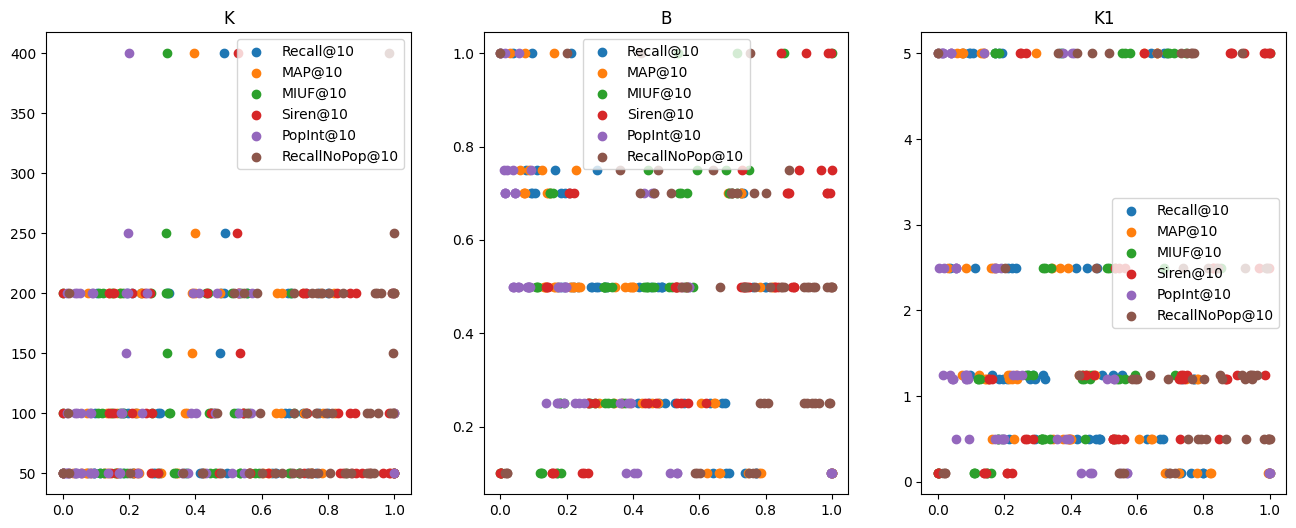

In [3]:
plt.figure(figsize=(16, 6))


def norm_series(x):
    return (x-x.min())/(x.max()-x.min())


for i, p in enumerate(['K', 'B', 'K1']):
    plt.subplot(131+i).set_title(p)
    plt.subplot(131+i).scatter(norm_series(grid_data['Recall@10']), grid_data[p], label='Recall@10')
    plt.subplot(131+i).scatter(norm_series(grid_data['MAP@10']), grid_data[p], label='MAP@10')
    plt.subplot(131+i).scatter(norm_series(grid_data['MIUF@10']), grid_data[p], label='MIUF@10')
    plt.subplot(131+i).scatter(norm_series(grid_data['Siren@10']), grid_data[p], label='Siren@10')
    plt.subplot(131+i).scatter(norm_series(grid_data['PopInt@10']), grid_data[p], label='PopInt@10')
    plt.subplot(131+i).scatter(norm_series(grid_data['RecallNoPop@10']), grid_data[p], label='RecallNoPop@10')

    plt.subplot(131+i).legend();

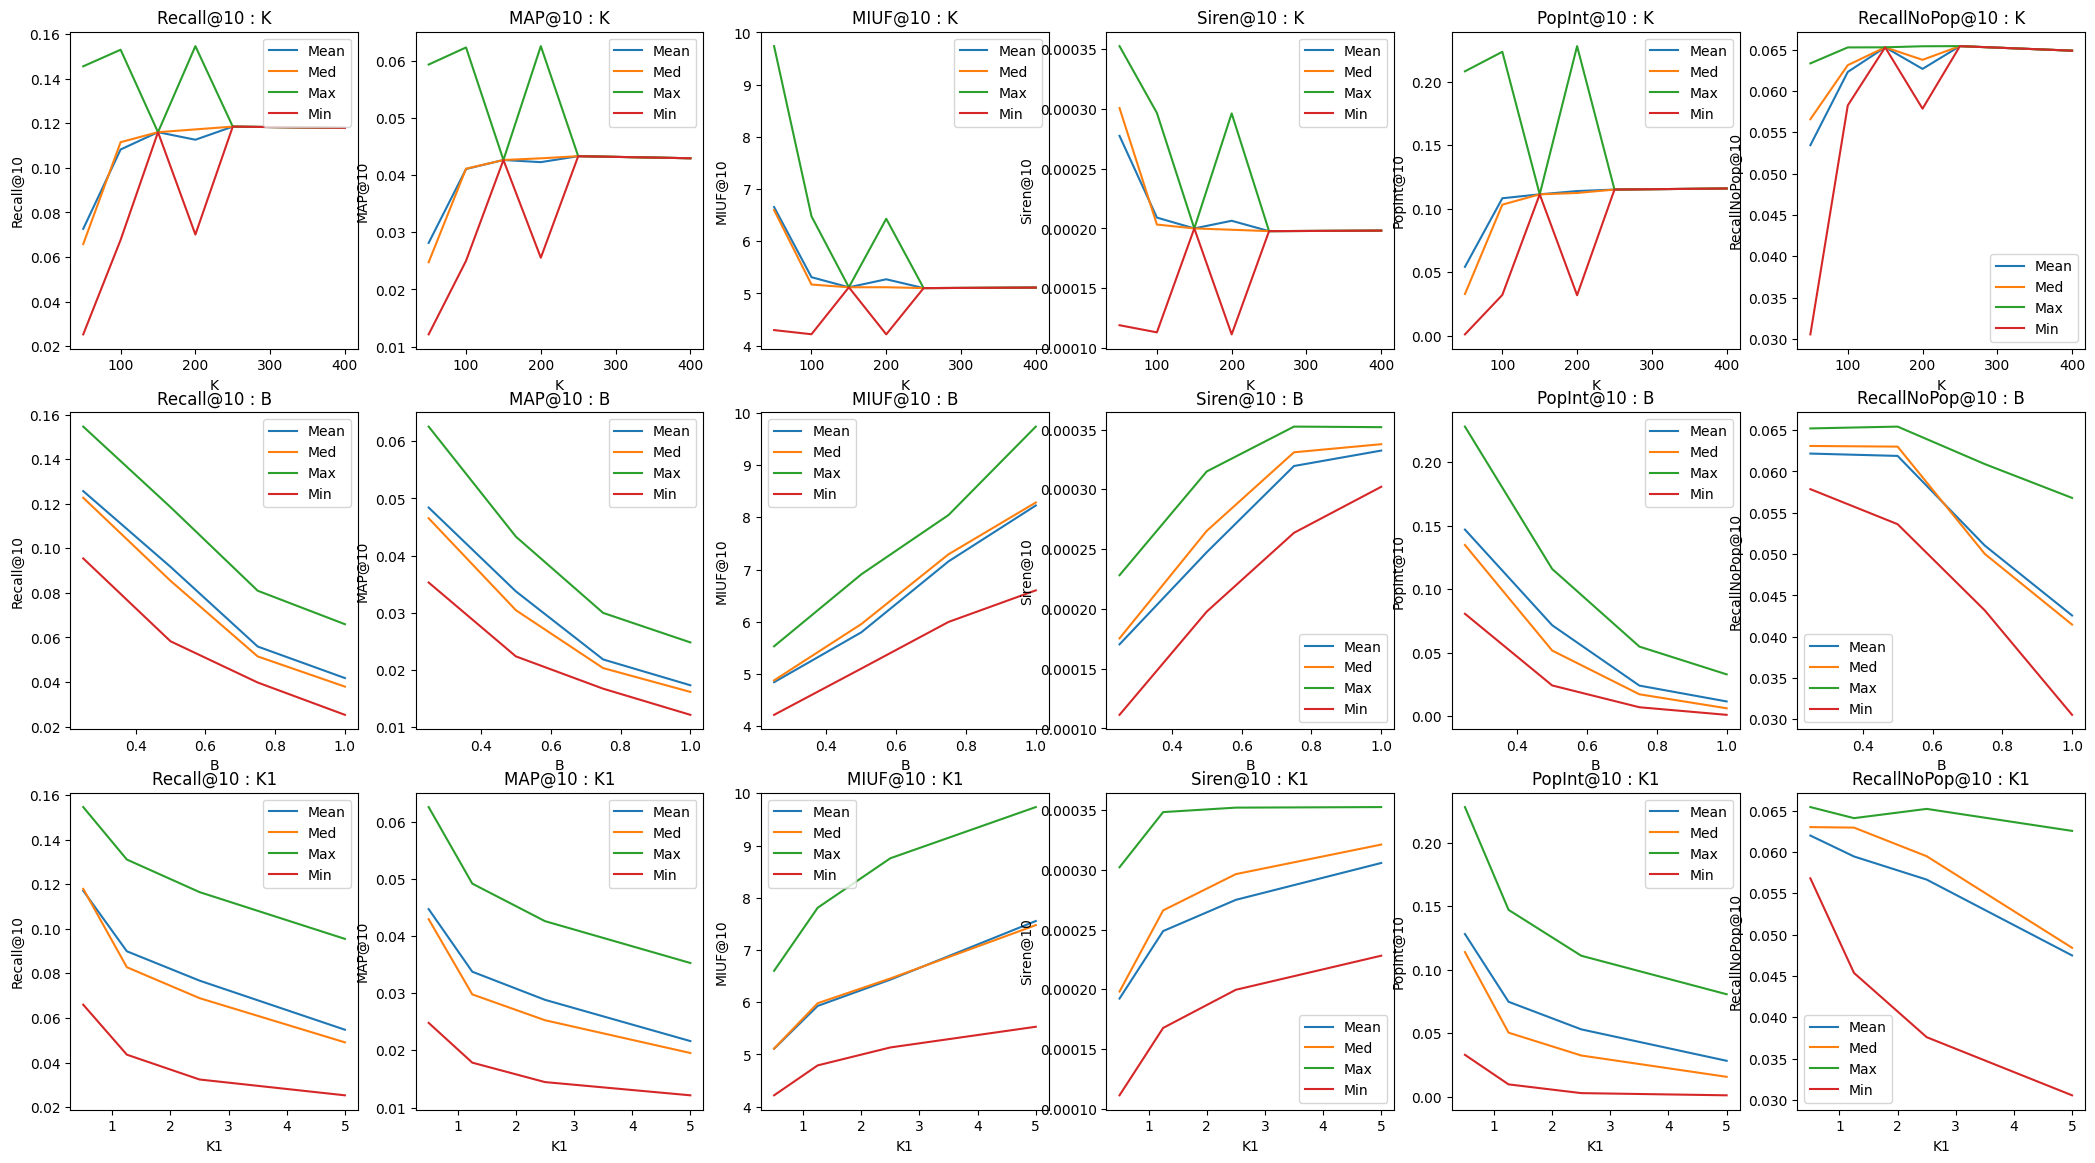

In [17]:
def get_dots(col: str, agg_func: typing.Callable = np.mean):
    return grid_data.groupby(col).agg(agg_func)

fig, axis = plt.subplots(3, 6)
fig.set_size_inches(26, 14)

for i, p in enumerate(
    ['K', 'B', 'K1']
):
    for j, m in enumerate(['Recall@10', 'MAP@10', 'MIUF@10', 'Siren@10', 'PopInt@10', 'RecallNoPop@10']):
        mean_dots = get_dots(p, 'mean')
        med_dots = get_dots(p, 'median')
        max_dots = get_dots(p, 'max')
        min_dots = get_dots(p, 'min')

        axis[i][j].set_title(f"{m} : {p}")
        axis[i][j].set_xlabel(p)
        axis[i][j].set_ylabel(m)

        axis[i][j].plot(mean_dots.index, mean_dots[m], label='Mean')
        axis[i][j].plot(med_dots.index, med_dots[m], label='Med')
        axis[i][j].plot(max_dots.index, max_dots[m], label='Max')
        axis[i][j].plot(min_dots.index, min_dots[m], label='Min')

        axis[i][j].legend();

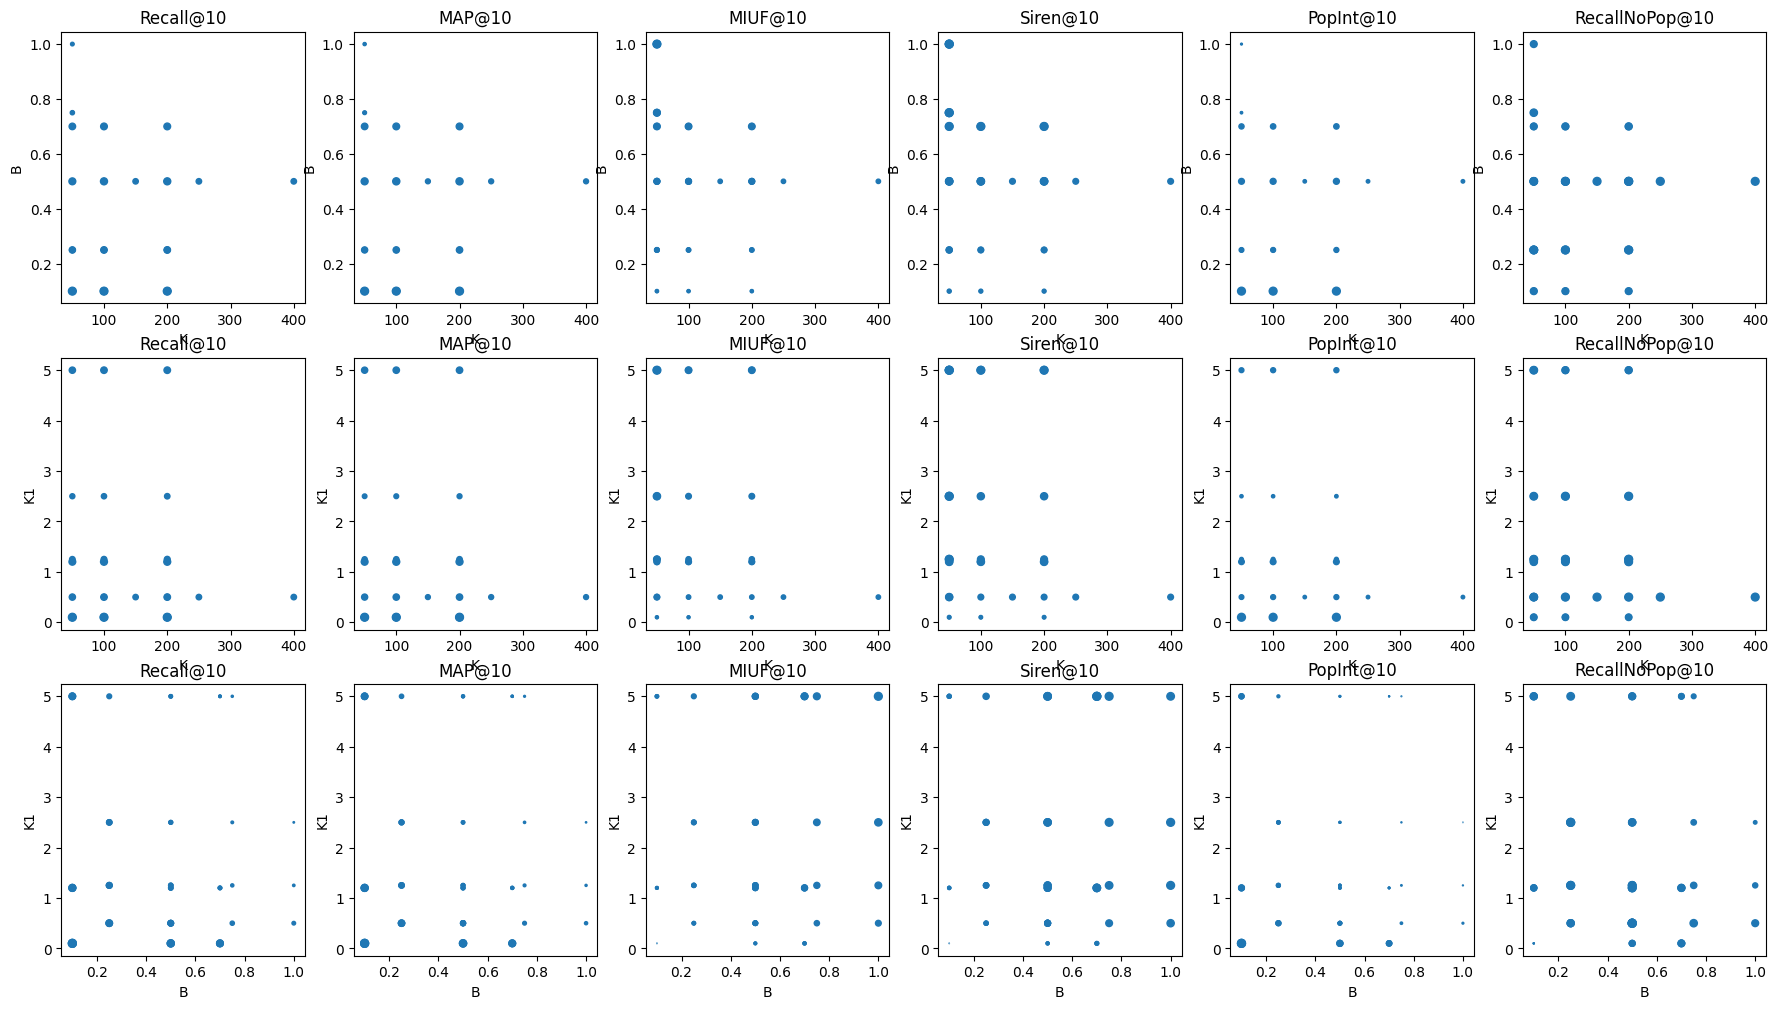

In [4]:
fig, axis = plt.subplots(3, 6)
fig.set_size_inches(22, 12)

for i, p in enumerate((
    ['K', 'B'],
    ['K', 'K1'],
    ['B', 'K1']
)):
    for j, m in enumerate(['Recall@10', 'MAP@10', 'MIUF@10', 'Siren@10', 'PopInt@10', 'RecallNoPop@10']):
        axis[i][j].set_title(m)
        axis[i][j].set_xlabel(p[0])
        axis[i][j].set_ylabel(p[1])
        axis[i][j].scatter(grid_data[p[0]], grid_data[p[1]], s=norm_series(grid_data[m])*32);

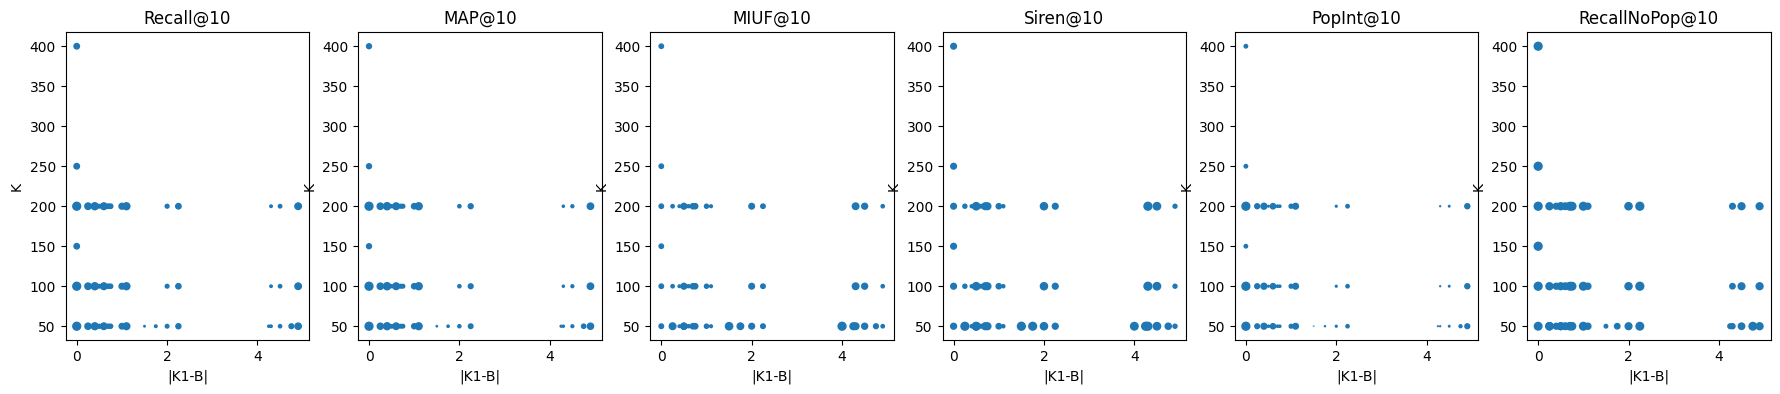

In [5]:
fig, axis = plt.subplots(1, 6)
fig.set_size_inches(22, 4)

for i, p in enumerate((
    ['K1', 'B'],
)):
    for j, m in enumerate(['Recall@10', 'MAP@10', 'MIUF@10', 'Siren@10', 'PopInt@10', 'RecallNoPop@10']):
        axis[j].set_title(m)
        axis[j].set_xlabel(f"|{p[0]}-{p[1]}|")
        axis[j].set_ylabel('K')
        axis[j].scatter((grid_data[p[0]] - grid_data[p[1]]).abs(), grid_data['K'], s=norm_series(grid_data[m])*32);

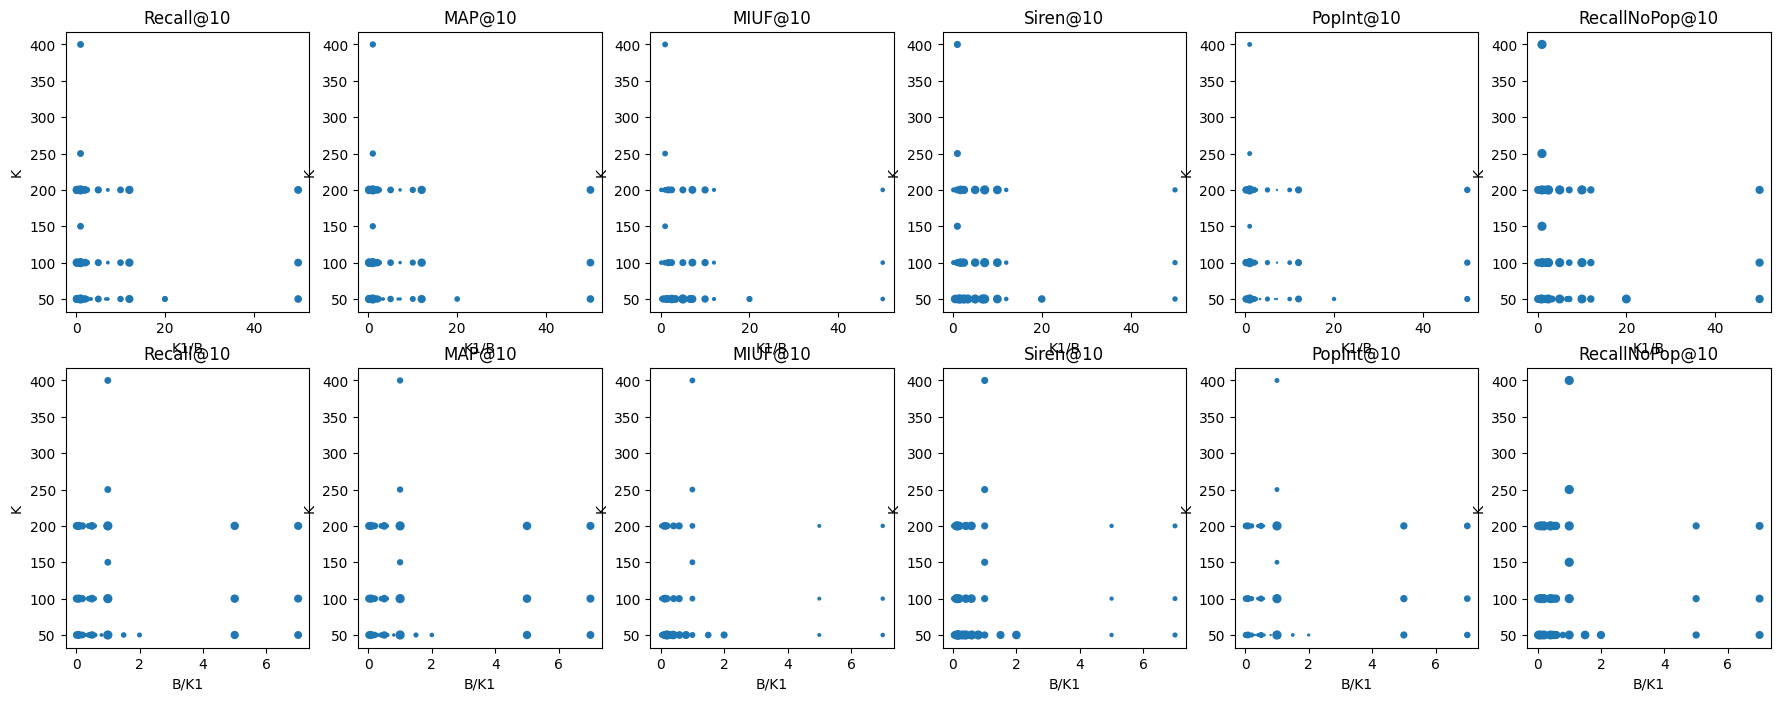

In [6]:
fig, axis = plt.subplots(2, 6)
fig.set_size_inches(22, 8)

for i, p in enumerate((
    ['K1', 'B'],
    ['B', 'K1'],
)):
    for j, m in enumerate(['Recall@10', 'MAP@10', 'MIUF@10', 'Siren@10', 'PopInt@10', 'RecallNoPop@10']):
        axis[i][j].set_title(m)
        axis[i][j].set_xlabel(f"{p[0]}/{p[1]}")
        axis[i][j].set_ylabel('K')
        axis[i][j].scatter(grid_data[p[0]] / grid_data[p[1]], grid_data['K'], s=norm_series(grid_data[m])*32);

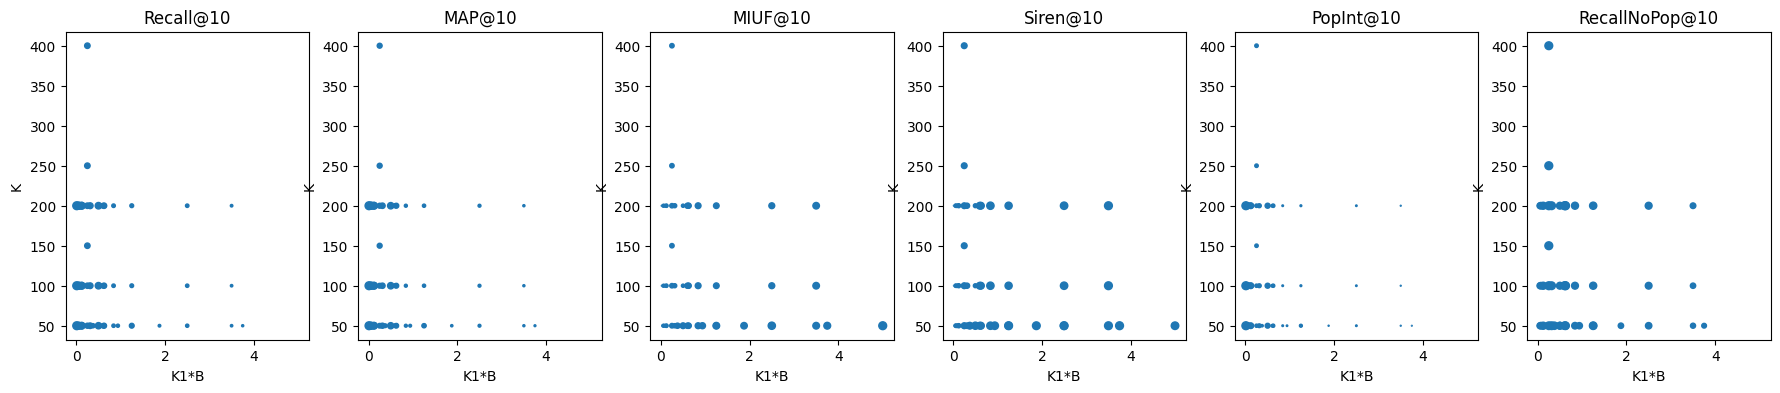

In [7]:
fig, axis = plt.subplots(1, 6)
fig.set_size_inches(22, 4)

for i, p in enumerate((
    ['K1', 'B'],
)):
    for j, m in enumerate(['Recall@10', 'MAP@10', 'MIUF@10', 'Siren@10', 'PopInt@10', 'RecallNoPop@10']):
        axis[j].set_title(m)
        axis[j].set_xlabel(f"{p[0]}*{p[1]}")
        axis[j].set_ylabel('K')
        axis[j].scatter(grid_data[p[0]] * grid_data[p[1]], grid_data['K'], s=norm_series(grid_data[m])*32);

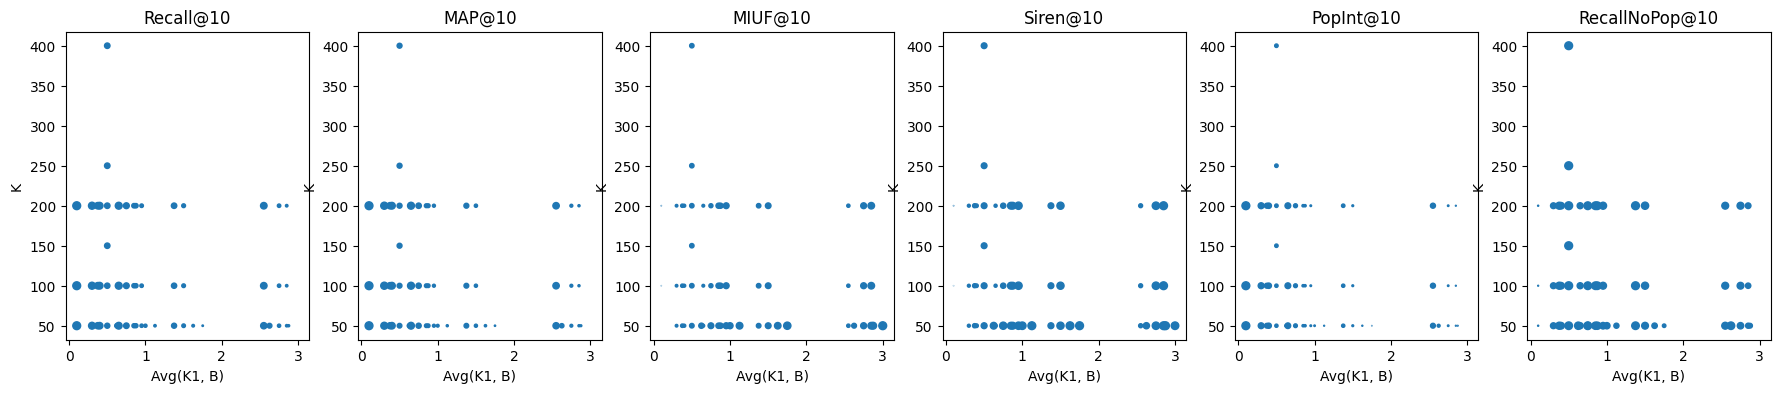

In [8]:
fig, axis = plt.subplots(1, 6)
fig.set_size_inches(22, 4)

for i, p in enumerate((
    ['K1', 'B'],
)):
    for j, m in enumerate(['Recall@10', 'MAP@10', 'MIUF@10', 'Siren@10', 'PopInt@10', 'RecallNoPop@10']):
        axis[j].set_title(m)
        axis[j].set_xlabel(f"Avg({p[0]}, {p[1]})")
        axis[j].set_ylabel('K')
        axis[j].scatter((grid_data[p[0]] + grid_data[p[1]])/2, grid_data['K'], s=norm_series(grid_data[m])*32);

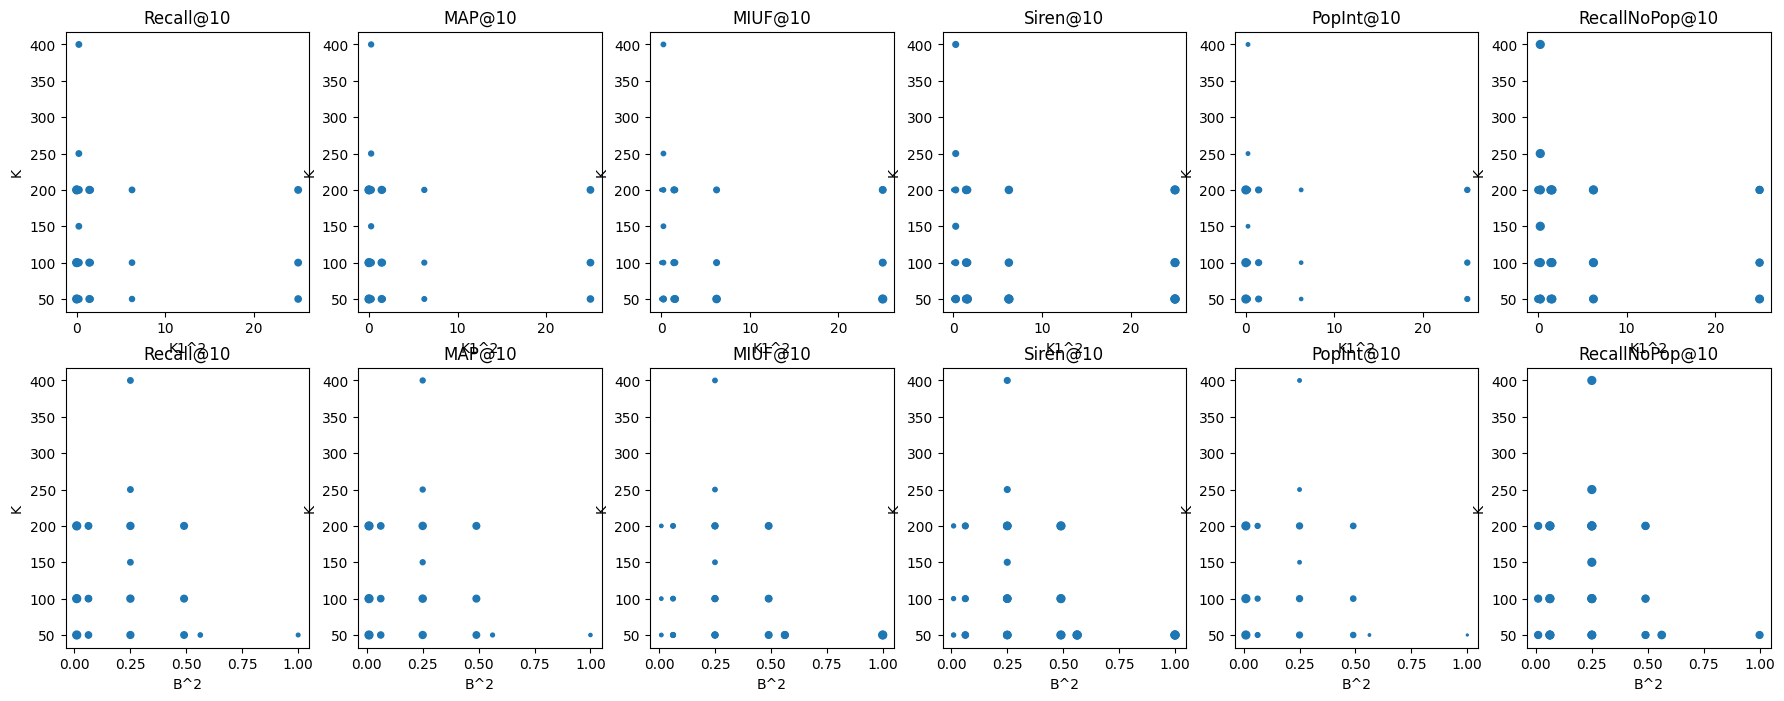

In [9]:
fig, axis = plt.subplots(2, 6)
fig.set_size_inches(22, 8)


for i, p in enumerate((
    ['K1'],
    ['B']
)):
    for j, m in enumerate(['Recall@10', 'MAP@10', 'MIUF@10', 'Siren@10', 'PopInt@10', 'RecallNoPop@10']):
        axis[i][j].set_title(m)
        axis[i][j].set_xlabel(f"{p[0]}^2")
        axis[i][j].set_ylabel('K')
        axis[i][j].scatter(grid_data[p[0]]**2, grid_data['K'], s=norm_series(grid_data[m])*32);

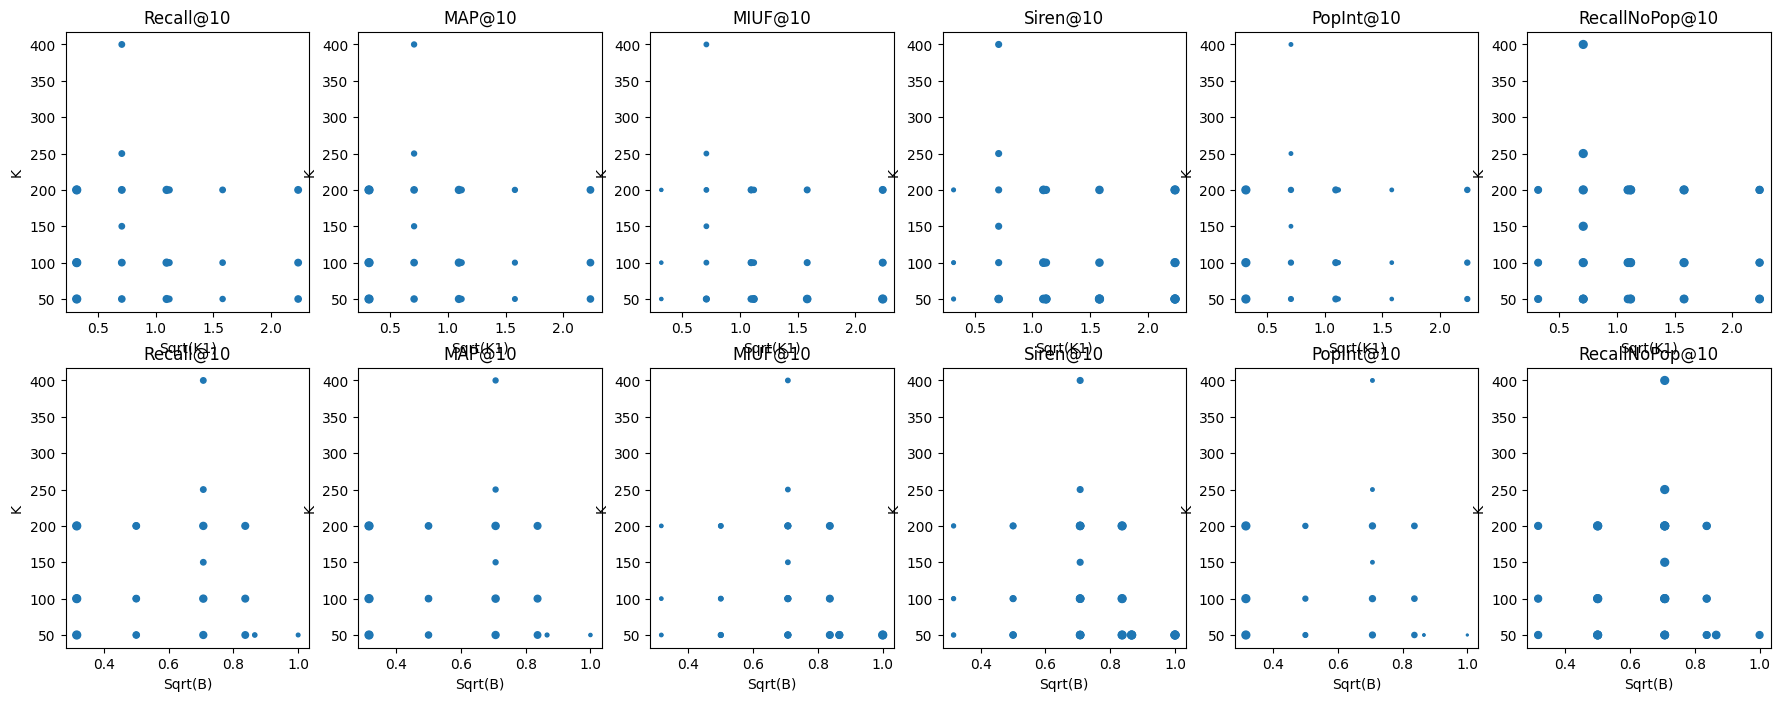

In [10]:
fig, axis = plt.subplots(2, 6)
fig.set_size_inches(22, 8)


for i, p in enumerate((
    ['K1'],
    ['B']
)):
    for j, m in enumerate(['Recall@10', 'MAP@10', 'MIUF@10', 'Siren@10', 'PopInt@10', 'RecallNoPop@10']):
        axis[i][j].set_title(m)
        axis[i][j].set_xlabel(f"Sqrt({p[0]})")
        axis[i][j].set_ylabel('K')
        axis[i][j].scatter(grid_data[p[0]]**(1/2), grid_data['K'], s=norm_series(grid_data[m])*32);

In [11]:
grid_data.to_csv('reports/full_knn_models_grid_report.csv');